Rami, Nicola Srour (2025)

Title: Pakistan e-commerce dataset, gradient descent, regressor

In [ ]:
# import the needed libraries
import pandas as pd
import sklearn.model_selection

In [ ]:
# show dataset and all columns
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")
pd.set_option('display.max_columns', None)
df.head(3)

<ipython-input-2-def181c7606d>:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove not needed fatures
df = df.drop(['item_id', 'sku', 'increment_id', 'sales_commission_code', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)
# delete duplicates
df = df.drop_duplicates()
# remove nulls
df = df.dropna()
df.head(4)

,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17
1,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17
2,canceled,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17
3,complete,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17


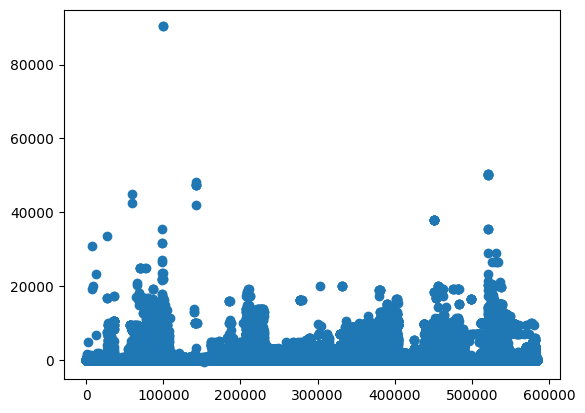

In [ ]:
# use scatter plot to remove outliers
import matplotlib.pyplot as plt

plt.scatter(df.index, df['discount_amount'])
plt.show()

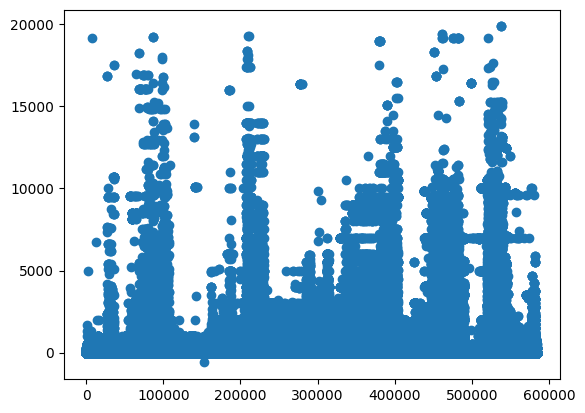

In [ ]:
df = df[df['discount_amount'] < 20000]
plt.scatter(df.index, df['discount_amount'])
plt.show()

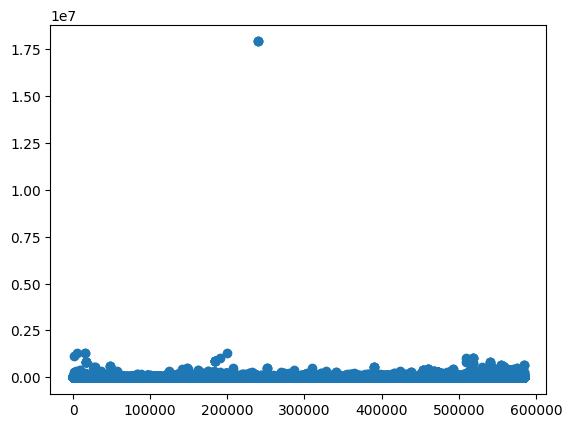

In [ ]:
plt.scatter(df.index, df['grand_total'])
plt.show()

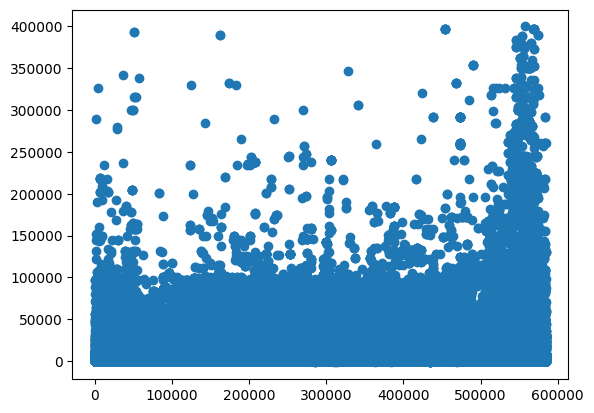

In [ ]:
df = df[df['grand_total'] < 400000]
plt.scatter(df.index, df['grand_total'])
plt.show()

In [ ]:
# do the same with MV column but first i have to turn totally to string
# i couldn't selected it by its name so i used iloc method
df.iloc[:, 10] = df.iloc[:, 10].str.replace(",","")
df.iloc[:, 10] = pd.to_numeric(df.iloc[:, 10], errors="coerce")
df = df.dropna()
df.iloc[:, 10] = df.iloc[:, 10].astype(float)

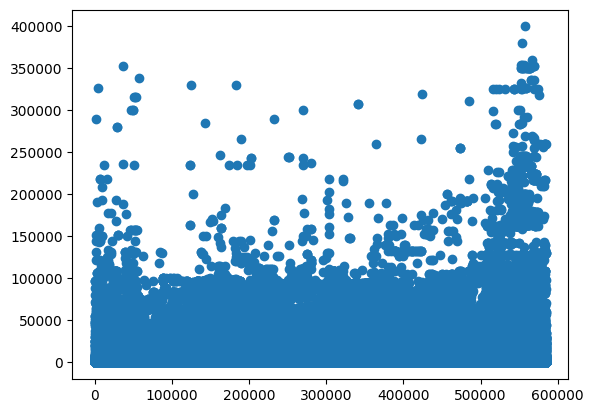

In [ ]:
plt.scatter(df.index, df.iloc[:, 10])
plt.show()

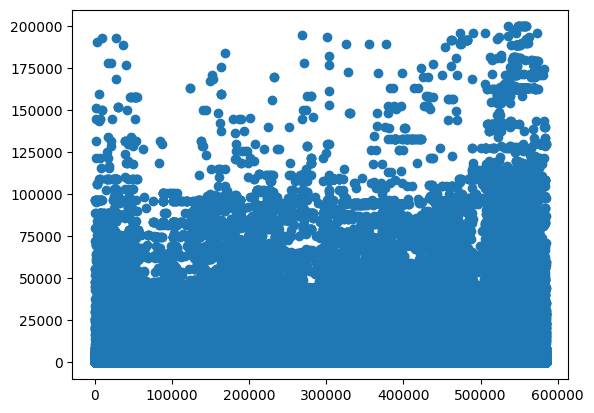

In [ ]:
df = df[df.iloc[:, 10] < 200000]
plt.scatter(df.index, df.iloc[:, 10])
plt.show()

In [ ]:
# counting unique values in each column with cateogrical values to know which encoding method to use
uniquestatus= df['status'].nunique()
uniquecategoryname = df['category_name_1'].nunique()
uniquepaymentmethod = df['payment_method'].nunique()
uniquebistatus = df['BI Status'].nunique()
uniqueFY = df['FY'].nunique()

print(uniquestatus, uniquecategoryname, uniquepaymentmethod, uniquebistatus, uniqueFY )

16 16 18 4 3


In [ ]:
fy = df['FY'].unique()
BIStatus = df['BI Status'].unique()
print(fy, BIStatus)

['FY17' 'FY18' 'FY19'] ['#REF!' 'Gross' 'Net' 'Valid']


In [ ]:
# encode categorical values to numbers
df['FY'] = df['FY'].replace({'FY17':1,'FY18':2,'FY19': 3})
df['BI Status'] = df['BI Status'].replace({'#REF!':1,'Gross':2,'Net': 3, 'Valid':4})
df.head(3)

<ipython-input-13-99bdbed91152>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FY'] = df['FY'].replace({'FY17':1,'FY18':2,'FY19': 3})
<ipython-input-13-99bdbed91152>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BI Status'] = df['BI Status'].replace({'#REF!':1,'Gross':2,'Net': 3, 'Valid':4})


,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,1,1950.0,2016.0,7.0,2016-7,7-2016,1
1,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,2,240.0,2016.0,7.0,2016-7,7-2016,1
2,canceled,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,2,2450.0,2016.0,7.0,2016-7,7-2016,1


In [ ]:
# changed date columns values to date data
df['created_at'] = pd.to_datetime(df['created_at'])
df['Working Date'] = pd.to_datetime(df['Working Date'])
df['Customer Since'] = pd.to_datetime(df['Customer Since'])
df['M-Y'] = pd.to_datetime(df['M-Y'])

<ipython-input-14-264fb66e2202>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['M-Y'] = pd.to_datetime(df['M-Y'])


In [ ]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['category_name_1'] = encoder.fit_transform(df['category_name_1'])
df['payment_method'] = encoder.fit_transform(df['payment_method'])
df['status'] = encoder.fit_transform(df['status'])
df['created_at'] = encoder.fit_transform(df['created_at'])
df['Working Date'] = encoder.fit_transform(df['Working Date'])
df['Customer Since'] = encoder.fit_transform(df['Customer Since'])
df['M-Y'] = encoder.fit_transform(df['M-Y'])
df.head(2)

,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,4,0,1950.0,1.0,1950.0,14,0.0,6,0,1,1950.0,2016.0,7.0,0,0,1
1,1,0,240.0,1.0,240.0,1,0.0,6,0,2,240.0,2016.0,7.0,0,0,1


In [ ]:
# find standard deviation and the average of the target column, as it can help in explaining MSE results
avr = df['grand_total'].mean()
std = df['grand_total'].std()
print("Average:", avr )
print("Standard deviaiton: ", std)

Average: 7334.910488946278
Standard deviaiton:  17569.442262688368


In [ ]:
# split the dataset, build, train and test the machine learning models
x = df.drop(['grand_total'], axis=1)
y = df['grand_total']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (416828, 16)
x_train: (312621, 15)
y_train: (312621,)
x_test: (104207, 15)
y_test: (104207,)


In [ ]:
from sklearn.linear_model import SGDRegressor
parameters_gb = {'alpha':[0.0001, 0.001], 'max_iter':[500, 1000],
                 'tol': [ 0.001, 0.01]}
model_gb_tunned = sklearn.linear_model.SGDRegressor()
clf_gb_tunned = sklearn.model_selection.RandomizedSearchCV(model_gb_tunned, parameters_gb,
                                                           scoring = 'neg_mean_squared_error',n_jobs=-1,n_iter=5)

clf_gb_tunned.fit(x_train, y_train)
print(clf_gb_tunned.best_score_)
print(clf_gb_tunned.best_params_)

-4.078517497204176e+33
{'tol': 0.01, 'max_iter': 500, 'alpha': 0.0001}


In [ ]:
y_pred = clf_gb_tunned.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("R2 score:", r2)

MSE: 2.0343463157035855e+34
R2 score: -6.7568674524836535e+25


Dataset Reference:
Usmani, Z and Rasheed. S, (2021), Pakistan's Largest E-Commerce Dataset, Kaggle, Available at: https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset, (Accessed : 04/04/2025)